In [1]:
!pip install opencv-python matplotlib imageio gdown tensorflow-macos tensorflow-metal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 11.5 MB/s eta 0:00:00
  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.2.14 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
scipy 1.10.0 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
langchain-community 0.2.12 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.


In [7]:
# pip install numpy==1.24.3 pandas==1.5.3


In [8]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
aiohappyeyeballs             2.4.0
aiohttp                      3.10.5
aiosignal                    1.3.1
annotated-types              0.7.0
anyio                        3.5.0
appdirs                      1.4.4
appnope                      0.1.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        24.2.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       4.1.0
blis                         1.0.1
Bottleneck                   1.3.5
brotlipy                     0.7.0
catalogue                    2.0.10
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           2.0.4
click                        8.1.7
cloudpathlib                 0.20.0

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [13]:
pip uninstall tensorflow -y

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tensorflow-macos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 9.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [16]:
pip install tensorflow-metal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.0 MB/s eta 0:00:00 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [125]:
import tensorflow as tf

# List physical devices
physical_devices = tf.config.list_physical_devices('GPU')

try:
        # Set memory growth before any TensorFlow operations
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("Memory growth enabled for", physical_devices[0])
except:
    pass

Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [126]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [128]:
# import gdown

# url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
# output = 'data.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('data.zip')

In [129]:
def load_video(path:str) -> List[float]:
    
    cap = cv2.VideoCapture(path)
    frames = []
    
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames,tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [130]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [131]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(), oov_token = "", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size = {char_to_num.vocabulary_size()})"

)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '](size = 40)


In [132]:
char_to_num(['q','a', 'm', 'a', 'r'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([17,  1, 13,  1, 18])>

In [133]:
num_to_char([17,  1, 13,  1, 18])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'q', b'a', b'm', b'a', b'r'], dtype=object)>

In [134]:
def load_alignments(path:str) -> List[str]:
    
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens, ' ', line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [135]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [136]:
test_path = 'practice/LipReading/data/s1/bbal6n.mpg'

In [137]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [138]:
frames,alignments = load_data(tf.convert_to_tensor(test_path))

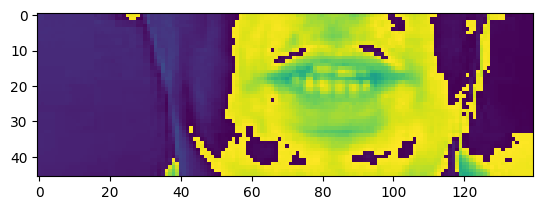

In [139]:
plt.imshow(frames[40])

In [140]:
num_to_char(alignments)

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'l', b' ', b's', b'i', b'x', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [141]:
 def mappable_function(path:str) -> List[str]:
        result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
        return result

## Creating Data Pipeline

In [142]:
data = tf.data.Dataset.list_files('./data/s1/*mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None], [40]))
data = data.prefetch(tf.data.AUTOTUNE)

train = data.take(450)
test = data.skip(450)

In [173]:
train = train.repeat()

In [143]:
frames, alignments = data.as_numpy_iterator().next()

In [144]:
alignments

array([[ 2,  9, 14, 39, 23,  8,  9, 20,  5, 39,  9, 14, 39, 20, 39, 15,
        14,  5, 39,  1,  7,  1,  9, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39,  5,  9,
         7,  8, 20, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [145]:
test = data.as_numpy_iterator()

In [146]:
val = test.next()

In [147]:
frames = [np.squeeze(frame) for frame in val[0][0]]
frames = [np.uint8(frame * 255) for frame in frames]


In [148]:
imageio.mimsave('./animation.gif', frames, fps=10)


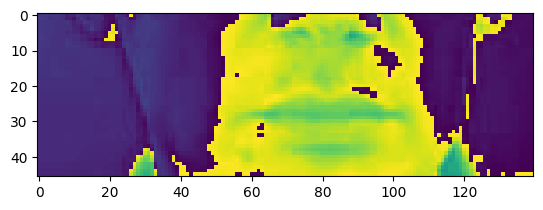

In [149]:
# first zero: videos, second zero: 1st video of the batch, third zero: returning the first frame
plt.imshow(val[0][0][0]) 

## DNN

In [150]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [151]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [152]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [153]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_9 (Conv3D)               │ (None, 75, 46, 140,    │         3,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 75, 46, 140,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_9 (MaxPooling3D)  │ (None, 75, 23, 70,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_10 (Conv3D)              │ (None, 75, 23, 70,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 75, 23, 70,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_10 (MaxPooling3D) │ (None, 75, 11, 35,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_11 (Conv3D)              │ (None, 75, 11, 35, 75) │       518,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 75, 11, 35, 75) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_11 (MaxPooling3D) │ (None, 75, 5, 17, 75)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 75, 6375)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 75, 256)        │     6,660,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 75, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 75, 41)         │        10,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [155]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'999nnnnnn999999999999999999999999999999999999999'>

In [156]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'999nnnnnn999999999999999999999999999999999999999'>

In [157]:
model.output_shape

(None, 75, 41)

## Training Setup

In [158]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [159]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [165]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset_iterator) -> None:
        self.dataset_iterator = dataset_iterator

    def on_epoch_end(self, epoch, logs=None) -> None:
        try:
            data = next(self.dataset_iterator)
            yhat = self.model.predict(data[0])
            decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=False)[0][0].numpy()
            for x in range(len(yhat)):
                print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
                print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
                print('~' * 100)
        except StopIteration:
            print("No more data in the dataset.")

In [166]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [167]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint.weights.h5'), monitor='loss', save_weights_only=True) 

In [168]:
schedule_callback = LearningRateScheduler(scheduler)

In [169]:
example_callback = ProduceExample(test)

In [ ]:
model.fit(train, 
          validation_data=test, 
          steps_per_epoch=len(list(train)), 
          epochs=100, 
          callbacks=[checkpoint_callback, schedule_callback, example_callback])

[mpeg1video @ 0x36daa0d60] ac-tex damaged at 22 17
[mpeg1video @ 0x36daa0d60] Warning MVs not available
[mpeg1video @ 0x36b176e80] ac-tex damaged at 22 17
[mpeg1video @ 0x36b176e80] Warning MVs not available
[mpeg1video @ 0x4891374c0] ac-tex damaged at 22 17
[mpeg1video @ 0x4891374c0] Warning MVs not available
[mpeg1video @ 0x41c6876c0] ac-tex damaged at 22 17
[mpeg1video @ 0x41c6876c0] Warning MVs not available
[mpeg1video @ 0x41c6a5b00] ac-tex damaged at 22 17
[mpeg1video @ 0x41c6a5b00] Warning MVs not available
[mpeg1video @ 0x4891fd700] ac-tex damaged at 22 17
[mpeg1video @ 0x4891fd700] Warning MVs not available
[mpeg1video @ 0x62d14ce10] ac-tex damaged at 22 17
[mpeg1video @ 0x62d14ce10] Warning MVs not available
[mpeg1video @ 0x62d1dd2c0] ac-tex damaged at 22 17
[mpeg1video @ 0x62d1dd2c0] Warning MVs not available
[mpeg1video @ 0x7ae55dc10] ac-tex damaged at 22 17
[mpeg1video @ 0x7ae55dc10] Warning MVs not available
 16%|████████████▉                                              

In [ ]:
ffmpeg -i corrupted_video.mpg -c:v copy -c:a copy repaired_video.mpg

SyntaxError: invalid syntax (1117209396.py, line 1)

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

# Enable memory growth for GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled for", physical_devices[0])
    except Exception as e:
        print(e)

# Load video frames and normalize
def load_video(path: str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236, 80:220, :])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

# Define vocabulary
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size = {char_to_num.vocabulary_size()})"
)

# Load alignment data
def load_alignments(path: str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens, ' ', line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

# Load data
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)
    return frames, alignments

# Mappable function for tf.data
def mappable_function(path: str) -> List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# Prepare dataset
data = tf.data.Dataset.list_files('./data/s1/*mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75, 46, 140, 1], [40]))
data = data.prefetch(tf.data.AUTOTUNE)

# Train and test split
train = data.take(450).repeat()
test = data.skip(450).repeat()

# Create GIF for visualization
test_iterator = iter(test)
val = next(test_iterator)
frames = [np.squeeze(frame) for frame in val[0][0]]
frames = [np.uint8(frame * 255) for frame in frames]
imageio.mimsave('./animation.gif', frames, fps=10)

# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Custom CTC Loss
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

# Callback to show predictions
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset_iterator) -> None:
        self.dataset_iterator = dataset_iterator

    def on_epoch_end(self, epoch, logs=None) -> None:
        try:
            data = next(self.dataset_iterator)
            yhat = self.model.predict(data[0])
            decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=False)[0][0].numpy()
            for x in range(len(yhat)):
                print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
                print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
                print('~' * 100)
        except StopIteration:
            print("No more data in the dataset.")

# Compile and train the model
batch_size = 2
steps_per_epoch = 450 // batch_size
validation_steps = 50 // batch_size

model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

checkpoint_callback = ModelCheckpoint(
    os.path.join('models', 'checkpoint.weights.h5'), monitor='loss', save_weights_only=True
)
schedule_callback = LearningRateScheduler(scheduler)
example_iterator = iter(test)
example_callback = ProduceExample(example_iterator)

model.fit(
    train,
    validation_data=test,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=100,
    callbacks=[checkpoint_callback, schedule_callback, example_callback]
)